# California Housing Price Prediction

## 1. Business Understanding
The objective of this assignment is to improve a neural network model for predicting California housing prices. The goal is to achieve a lower Mean Absolute Error (MAE) than 0.3 (in units of $100,000). To achieve this, we will experiment with different model architectures and regularization techniques.

## 2. Data Understanding
We use the California housing dataset, which contains features such as median income, house age, and average rooms per household. The target variable is the median house value.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["target"])

# Display the first few rows of the dataset
print(X.head())
print(y.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   target
0   4.526
1   3.585
2   3.521
3   3.413
4   3.422


## 3. Data Preparation
We split the data into training, validation, and test sets. We also standardize the features to ensure that all variables contribute equally to the model.


In [2]:
# Import necessary libraries for data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## 4. Modeling
We create a function to build a neural network model. We experiment with different architectures and regularization techniques to find the best model.


In [3]:
# Import necessary libraries for modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create the model
def create_model(input_dim, hidden_layers, dropout_rate=0.0):
    model = Sequential()
    for units in hidden_layers:
        model.add(Dense(units, activation='relu', input_dim=input_dim))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
        input_dim = units
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
    return model

# Experiment with different architectures and regularization
architectures = [
    {'hidden_layers': [64, 64], 'dropout_rate': 0.0},
    {'hidden_layers': [128, 64], 'dropout_rate': 0.0},
    {'hidden_layers': [64, 64, 64], 'dropout_rate': 0.0},
    {'hidden_layers': [128, 128], 'dropout_rate': 0.2},
    {'hidden_layers': [64, 64], 'dropout_rate': 0.2},
]

results = []

for arch in architectures:
    print(f"Training model with architecture: {arch['hidden_layers']} and dropout rate: {arch['dropout_rate']}")
    model = create_model(input_dim=X_train_scaled.shape[1], hidden_layers=arch['hidden_layers'], dropout_rate=arch['dropout_rate'])
    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0)
    
    # Evaluate the model
    val_mae = model.evaluate(X_val_scaled, y_val, verbose=0)[1]
    print(f"Validation MAE: {val_mae}")
    results.append({'architecture': arch, 'val_mae': val_mae, 'model': model, 'history': history})


Training model with architecture: [64, 64] and dropout rate: 0.0


c:\Users\roope\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation MAE: 0.37029626965522766
Training model with architecture: [128, 64] and dropout rate: 0.0


c:\Users\roope\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation MAE: 0.35062935948371887
Training model with architecture: [64, 64, 64] and dropout rate: 0.0


c:\Users\roope\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation MAE: 0.35186466574668884
Training model with architecture: [128, 128] and dropout rate: 0.2


c:\Users\roope\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation MAE: 0.3466438353061676
Training model with architecture: [64, 64] and dropout rate: 0.2


c:\Users\roope\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation MAE: 0.3573443293571472


## 5. Evaluation
We select the best model based on validation MAE and retrain it using the combined training and validation sets. We then evaluate the model on the test set and plot the training history.


Best architecture: [128, 128] with dropout rate: 0.2
Test MAE: 0.331165611743927


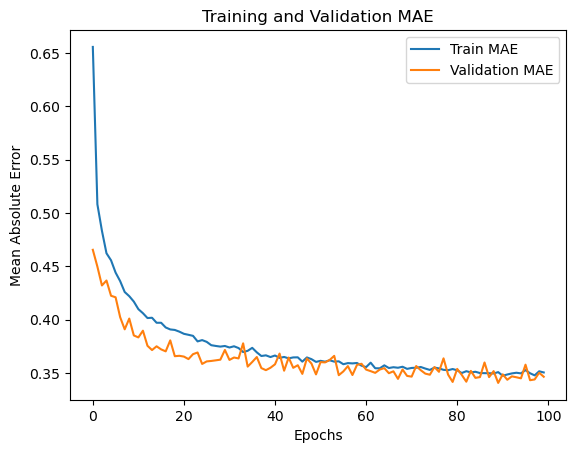

In [4]:
# Select the best model
best_result = min(results, key=lambda x: x['val_mae'])
best_model = best_result['model']
best_history = best_result['history']
best_architecture = best_result['architecture']

print(f"Best architecture: {best_architecture['hidden_layers']} with dropout rate: {best_architecture['dropout_rate']}")

# Combine training and validation sets and retrain the best model
X_train_val = np.vstack((X_train_scaled, X_val_scaled))
y_train_val = np.vstack((y_train, y_val))

best_model.fit(X_train_val, y_train_val, epochs=100, batch_size=32, verbose=0)

# Evaluate the final model on the test set
test_mae = best_model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print(f"Test MAE: {test_mae}")

# Plot the training history
plt.plot(best_history.history['mae'], label='Train MAE')
plt.plot(best_history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()
